<a href="https://colab.research.google.com/github/smbonilla/systemDiagrams/blob/main/supportWorkFlowDiagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How to use: 

1. Change User Input section to system specifics 
2. In menu at top of page > Runtime > Run All 
3. Scroll Down
4. Right Click and Save Image Support Workflow Diagram at the bottom of the page

### User Inputs 

`systemName` = (str) Name of system 

`numSteps` = (int) Number of escalation steps in support workflow (not including System User) 

`numInternal` = (int) Number of those escalation steps that are internal (i.e. not seen by System Users, most of the time numSteps and numInternal are the same) 

`contactNames` = (list of str) List of contact names in order of support (i.e. `["MPBE Help Desk", "DHCT", "ATOS IT Service Desk"]`)

`contactInfo` = (list of str) List of contacts of emails or phone numbers in order of support (i.e. `["uclh.enquiry.mpb.helpdesk@nhs.net","mpbit.uclh@nhs.net","0203 447 9367"]`)


In [2]:
systemName = 'Cadewell EMG Summit'

numSteps = 4

numInternal = 4 

contactNames = ["MPBE Helpdesk", "MPBE Clinical Engineering", "MPBE Scientific Computing", "Atos Service Desk"]

contactInfo = ["uclh.enquiry.mpb.helpdesk@nhs.net", "Email Team Leaders","mpbit.uclh@nhs.net", "0203 447 9367"]

### ----------------------------------------------------------Don't Change Code Below This ----------------------------------------------------------------------------

In [3]:
import sys
import warnings
warnings.filterwarnings('ignore')

In [4]:
if 'diagrams' not in sys.modules: 
  !pip install diagrams
else: 
  print("diagrams package already installed. Skipping download...")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.4/24.4 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.2/897.2 KB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 5.8 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [5]:
# check that contact names and info match number of steps
if numSteps != len(contactNames) or numSteps != len(contactInfo):
  raise Exception("The number of Contact Names and Contact Information should match the number of steps")

In [6]:

from diagrams import Cluster, Diagram, Edge
from diagrams.onprem.client import User 
from diagrams.custom import Custom
from diagrams.onprem.client import Users as Groups 

In [7]:
# save logo files in colab 
import requests 
from pathlib import Path

# set up path for logo files
logoPath = Path("logos/")

# if logoPath folder doesn't exist, create folder
if logoPath.is_dir():
  print(f"{logoPath} directory already exists ... skipping creation")
else:
  print(f"{logoPath} directory doesn't exist, creating one...")
  logoPath.mkdir(parents=True, exist_ok=True)

with open(logoPath / "ICTLogo.png", "wb") as f:
  request = requests.get("https://github.com/smbonilla/systemDiagrams/raw/main/logos/ICTLogo.png")
  print(f"Downloading ICTLogo file from github...")
  f.write(request.content)

f.close()


logos directory doesn't exist, creating one...


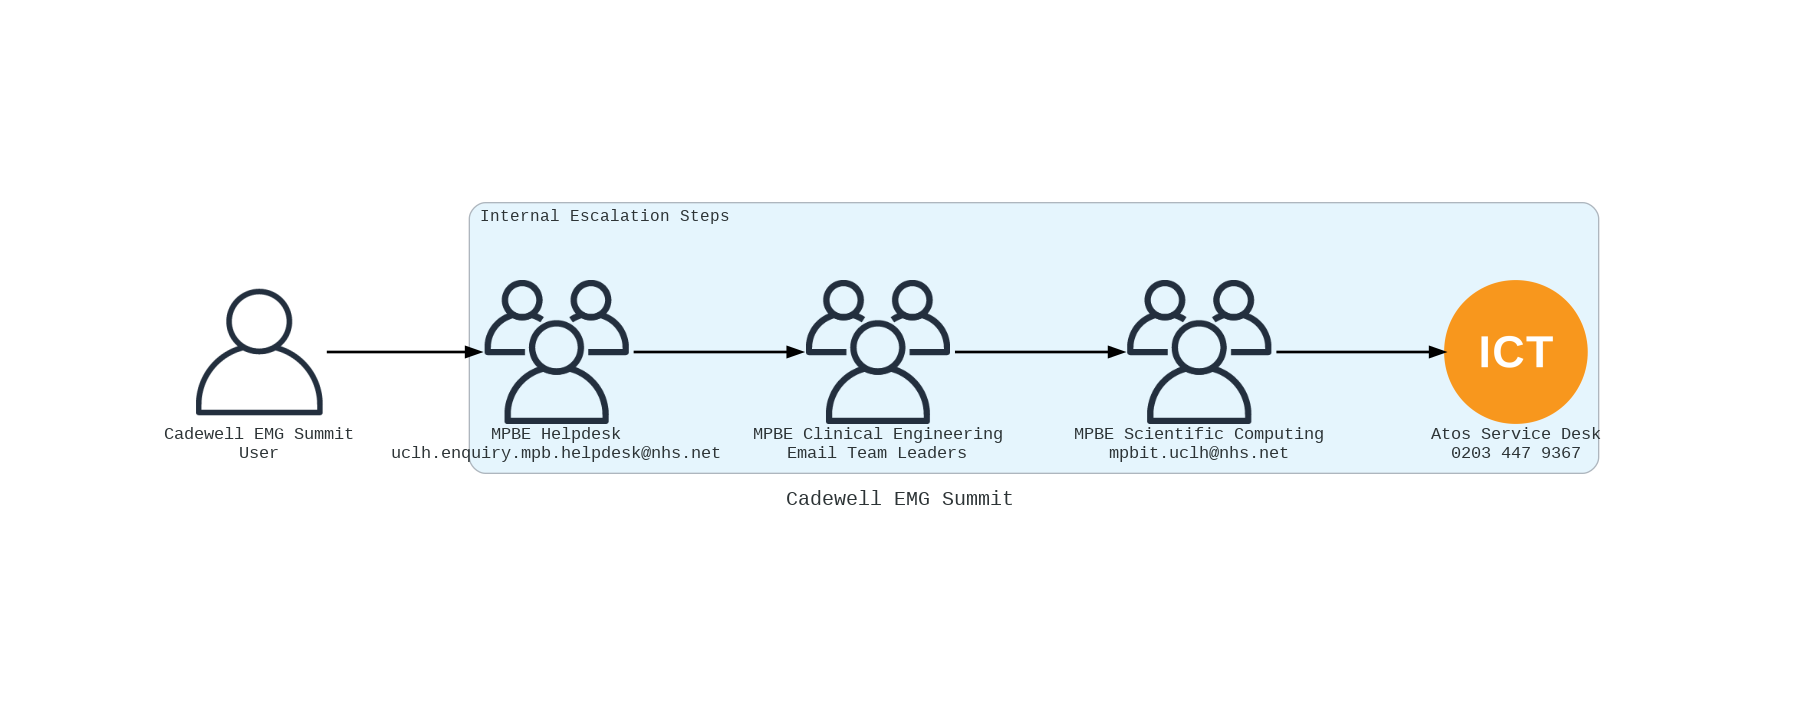

In [8]:
with Diagram(systemName, show=False) as diag:

  user = User(f"{systemName}\nUser")

  size = "2"

  internalGroup = []

  # if the number of steps and number of internal steps are the same 
  if numSteps == numInternal: 

    with Cluster("Internal Escalation Steps"):

      for step in range(numSteps): 
        if "Atos" in contactNames[step] or "ICT" in contactNames[step] or "ATOS" in contactNames[step]:
          ICT = Custom(f"{contactNames[step]}\n{contactInfo[step]}", "/content/logos/ICTLogo.png", width=size)
          internalGroup[step-1] - Edge(label="  ",style="bold", color="black") >> ICT 
        else:
          internalGroup.append(Groups(f"{contactNames[step]}\n{contactInfo[step]}", width=size))
          if step == 0:
            user >> Edge(label="        ",style="bold", color="black") >> internalGroup[step]
          else:
            internalGroup[step-1] >> Edge(label="  ",style="bold", color="black",) >>internalGroup[step]

  else:

    externalGroup = []

    numExternal = numSteps - numInternal

    for external in range(numExternal):

      externalGroup.append(Groups(f"{contactNames[external]}\n{contactInfo[external]}", width=size))
      if external == 0:
        user >> Edge(label="        ",style="bold", color="black") >> externalGroup
      elif external < (numSteps-numInternal):
        externalGroup[external-1] >> Edge(label="        ",style="bold", color="black") >> externalGroup[external]

    with Cluster("Internal Escalation Steps"):

      for step in range(numInternal): 
          totalStep = step + numExternal
          if "Atos" in contactNames[totalStep] or "ICT" in contactNames[totalStep] or "ATOS" in contactNames[totalStep]:
            ICT = Custom(f"{contactNames[totalStep]}\n{contactInfo[totalStep]}", "/content/logos/ICTLogo.png", width=size)
            internalGroup[step-1] - Edge(label="  ",style="bold", color="black") >> ICT 
          else:
            internalGroup.append(Groups(f"{contactNames[totalStep]}\n{contactInfo[totalStep]}", width="1.6"))
            if step == 0:
              externalGroup[external] >> Edge(label="        ",style="bold", color="black") >> internalGroup[step]
            else:
              internalGroup[step-1] >> Edge(label="        ",style="bold", color="black") >> internalGroup[step]


diag
